In [1]:
from fastai.basics import *
from fastai.vision.all import *
from sklearn import metrics

/home/tiago/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370151529/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from my_utils import dotdict

In [4]:
from wandb_sweep import get_dls, get_learner

In [5]:
from model_eval import get_val_preds, plot_CM, plot_CM_PR, plot_top_losses_glitches

In [6]:
import wandb

api = wandb.Api()

#### baseline

In [7]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
best_run_config = sweep.best_run().config

wandb: Sorting runs by -summary_metrics.combined_f1_time


In [8]:
config = dotdict(best_run_config)
config.correct_labels = True
config.inference = True
config.test_evaluation = True

In [9]:
dls, _, n_channels = get_dls(config)

In [10]:
learner = get_learner(config, dls, n_channels)

In [11]:
learner.load(f"{sweep_id}_run{config.experiment_no}")

In [12]:
preds, targets, soft_preds, y_true, y_pred = get_val_preds(learner)

In [13]:
cm = metrics.confusion_matrix(y_true, y_pred)

In [14]:
acc = metrics.accuracy_score(y_true, y_pred) * 100
f1 = metrics.f1_score(y_true, y_pred, average="macro") * 100
print(f"Overall accuracy: {acc:.2f}%")
print(f"Macro-averaged F1-score: {f1:.2f}%")

Overall accuracy: 98.68%
Macro-averaged F1-score: 97.18%


In [15]:
vocab = list(learner.dls.train_ds.class_dict.keys())

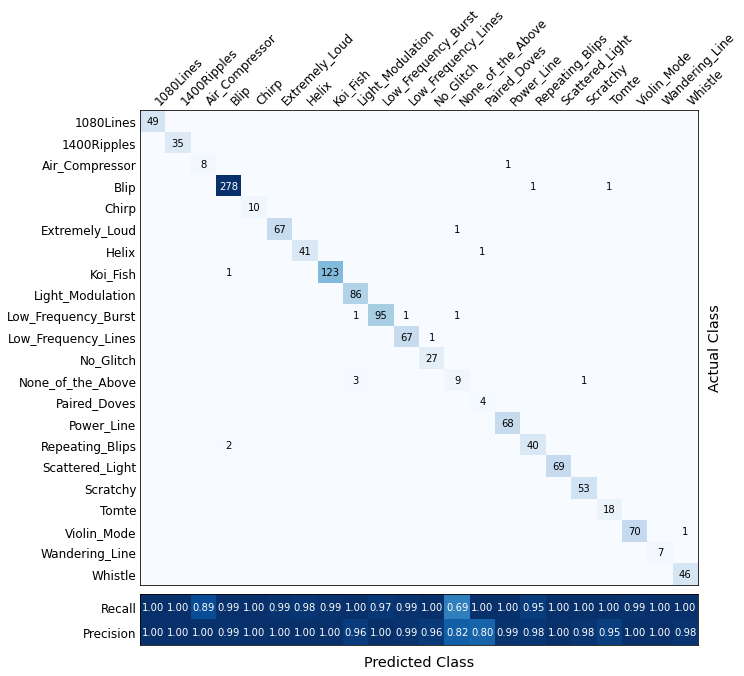

In [16]:
fig, axes = plot_CM_PR(cm, y_true=y_true, y_pred=y_pred, vocab=vocab)
fig.savefig("../figs/glitches/15_baseline_test_cm.png", dpi=300, bbox_inches="tight")

In [17]:
interp = Interpretation.from_learner(learner)

In [18]:
channel_list = [2, 0, 2, 0, 
                2, 2, 2, 0, 
                2, 1, 1, 0]

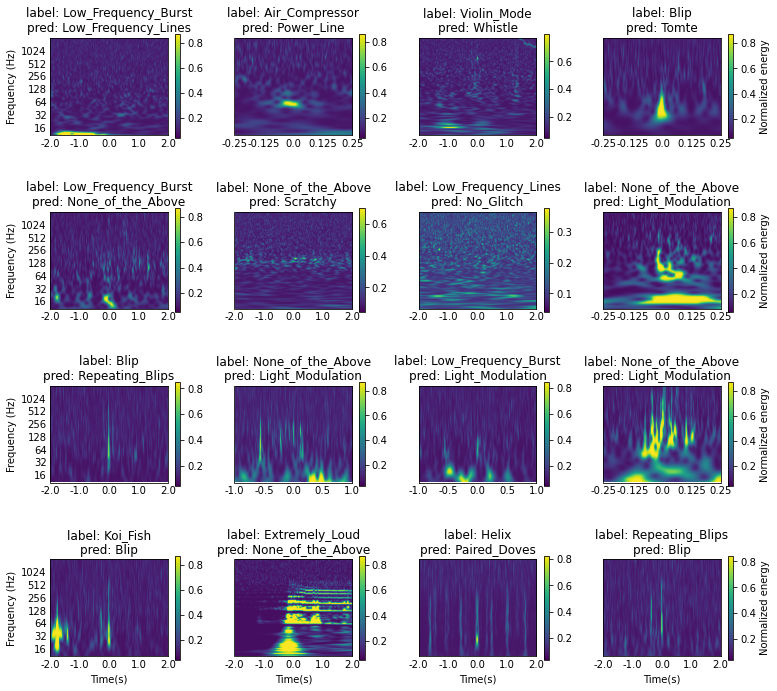

In [19]:
fig, ax = plot_top_losses_glitches(interp, learner, vocab=vocab,
    y_preds=y_pred, channel_list=channel_list,
    largest=True, nrows=4, ncols=4,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(11, 10)
)

#fig.savefig('../figs/glitches/04_baseline_best_mislabeled_samples.png', dpi=300)

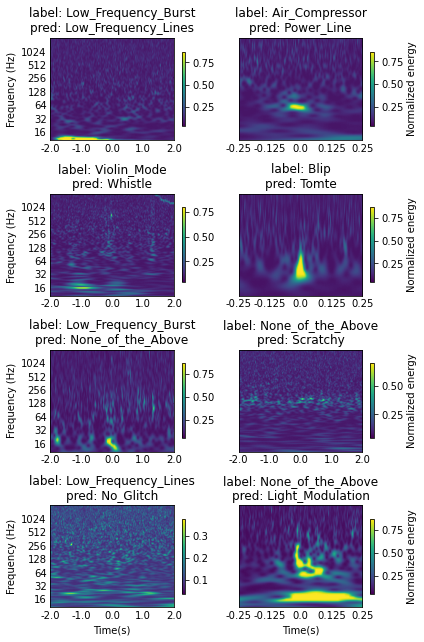

In [21]:
fig, ax = plot_top_losses_glitches(interp, learner, vocab=vocab,
    y_preds=y_pred, channel_list=channel_list,
    largest=True, nrows=4, ncols=2,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(6, 9)
)

fig.savefig('../figs/glitches/15_baseline_test_mislabeled_samples.png', dpi=300)